Inputs:
 [[0 0]
 [0 1]
 [1 0]
 [1 1]]
Hidden layer outputs h1: [0 0 1 0]
Hidden layer outputs h2: [0 1 0 0]
Final output y_hat: [0 1 1 0]


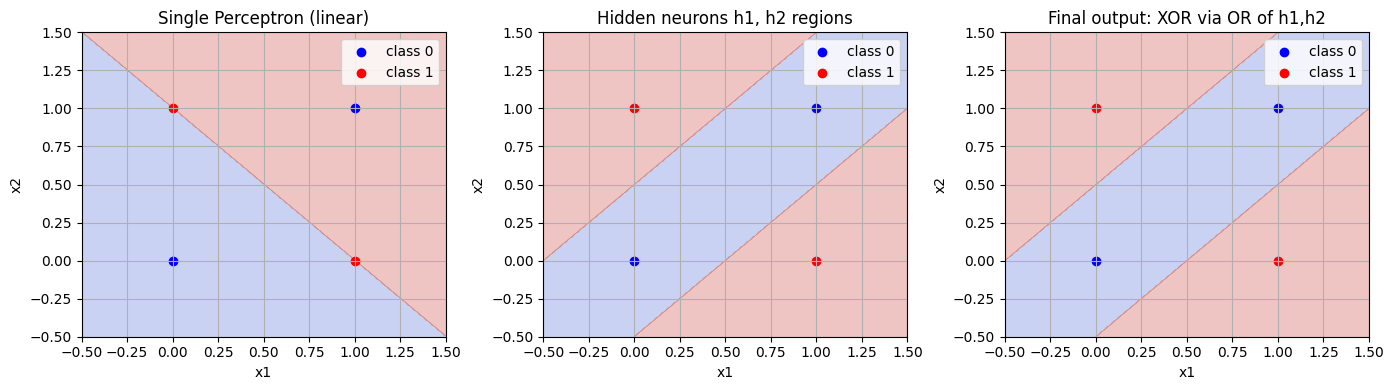

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# ========== 1. XOR 输入与标签 ==========
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])

# ========== 2. 定义三层感知机结构 ==========
# 手工设置权重和偏置，使其正好实现 XOR:
# 隐藏层：
# h1 = step(x1 - x2 - 0.5)  ≈ x1 AND (NOT x2)
# h2 = step(-x1 + x2 - 0.5) ≈ (NOT x1) AND x2
# 输出层：
# y = step(h1 + h2 - 0.5)   ≈ h1 OR h2

def step(x):
    return np.where(x > 0, 1, 0)

def forward(X):
    h1 = step(X[:, 0] - X[:, 1] - 0.5)
    h2 = step(-X[:, 0] + X[:, 1] - 0.5)
    y_hat = step(h1 + h2 - 0.5)
    return h1, h2, y_hat

h1, h2, y_hat = forward(X)

print("Inputs:\n", X)
print("Hidden layer outputs h1:", h1)
print("Hidden layer outputs h2:", h2)
print("Final output y_hat:", y_hat)

# ========== 3. 画图辅助函数 ==========
def plot_region(fn, title):
    xx, yy = np.meshgrid(np.linspace(-0.5, 1.5, 300),
                         np.linspace(-0.5, 1.5, 300))
    grid = np.c_[xx.ravel(), yy.ravel()]
    zz = fn(grid).reshape(xx.shape)
    plt.contourf(xx, yy, zz, cmap="coolwarm", alpha=0.3)
    plt.scatter(X[y == 0, 0], X[y == 0, 1], color="blue", label="class 0")
    plt.scatter(X[y == 1, 0], X[y == 1, 1], color="red", label="class 1")
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.legend()
    plt.grid(True)

# ========== 4. 绘制三个阶段 ==========
plt.figure(figsize=(14, 4))

# (1) 单层感知机尝试直接分 XOR
plt.subplot(1, 3, 1)
def linear_model(X_in):  # 一个直线分界（无法分对）
    w = np.array([1.0, 1.0])
    b = -1.0
    return step(X_in @ w + b)
plot_region(linear_model, "Single Perceptron (linear)")

# (2) 隐藏层两个感知机输出区域
plt.subplot(1, 3, 2)
def hidden_1(X_in): return step(X_in[:, 0] - X_in[:, 1] - 0.5)
def hidden_2(X_in): return step(-X_in[:, 0] + X_in[:, 1] - 0.5)
plot_region(lambda x: hidden_1(x) + hidden_2(x), "Hidden neurons h1, h2 regions")

# (3) 输出层 OR：将两个区域合并
plt.subplot(1, 3, 3)
def full_network(X_in):
    h1 = hidden_1(X_in)
    h2 = hidden_2(X_in)
    return step(h1 + h2 - 0.5)
plot_region(full_network, "Final output: XOR via OR of h1,h2")

plt.tight_layout()
plt.show()
